In [3]:
# Importing Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
# Importing warnings to remove unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading The Dataset
df = pd.read_csv("insurance.csv")

# Exploratory Data Analysis(EDA)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [9]:
df.duplicated().sum() # Finding the duplicates

1

In [10]:
df = df.drop_duplicates() # Removing the duplicates

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
df.shape

(1337, 7)

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Visualisation of Dataset with Various graphs

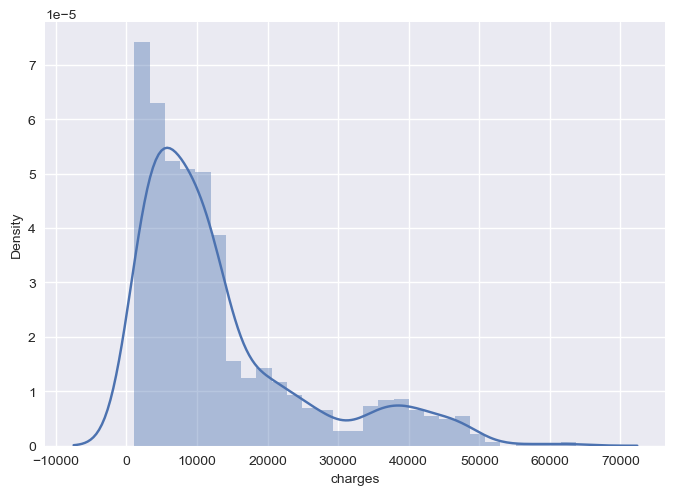

In [14]:
sns.distplot(df['charges'])
plt.show()

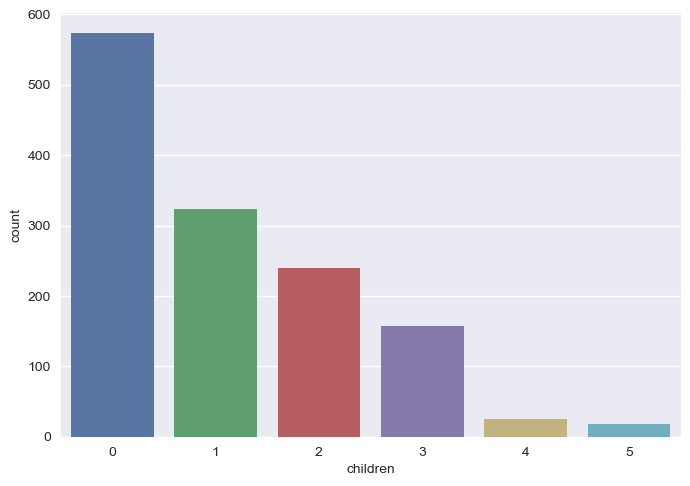

In [15]:
sns.countplot(x="children" , data=df)
plt.show()

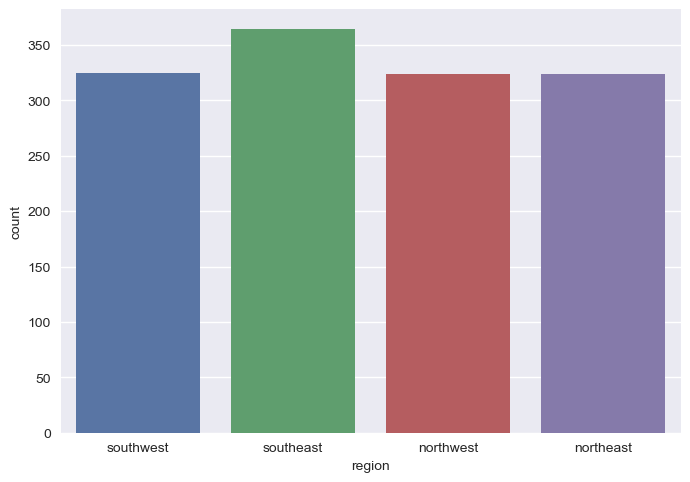

In [16]:
sns.countplot(x="region" , data=df)
plt.show()

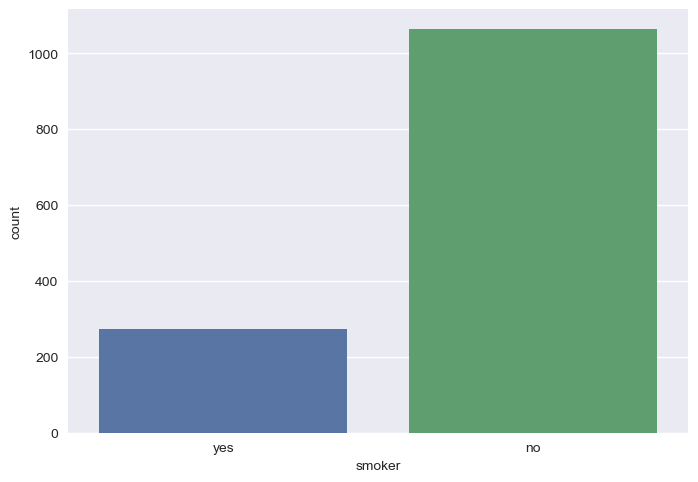

In [17]:
sns.countplot(x="smoker" , data=df)
plt.show()

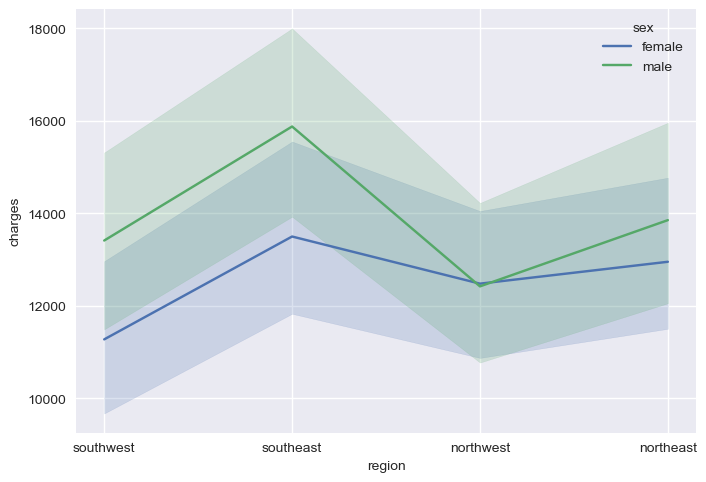

In [18]:
sns.lineplot(x='region' , y='charges' , data=df , hue = 'sex')
plt.show()

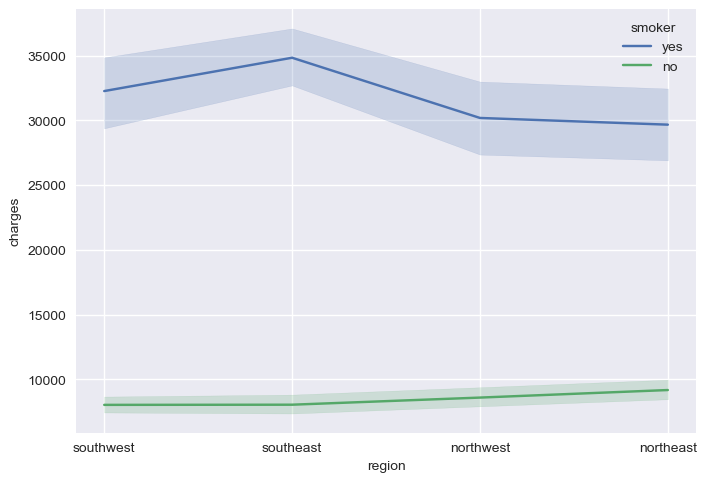

In [19]:
sns.lineplot(x='region' , y='charges' , data=df , hue='smoker')
plt.show()

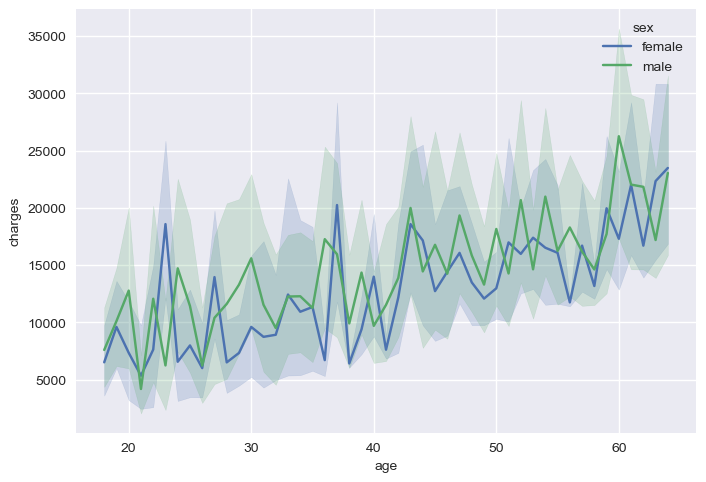

In [20]:
sns.lineplot(x='age' , y='charges' , data=df , hue='sex')
plt.show()

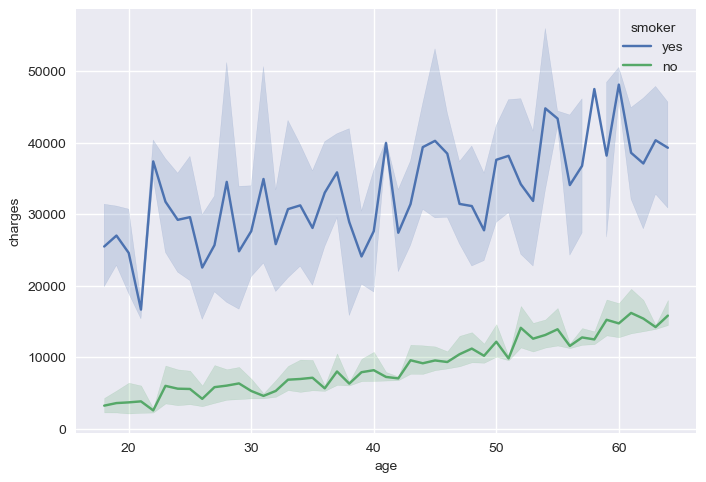

In [21]:
sns.lineplot(x='age' , y='charges' , data=df , hue='smoker')
plt.show()

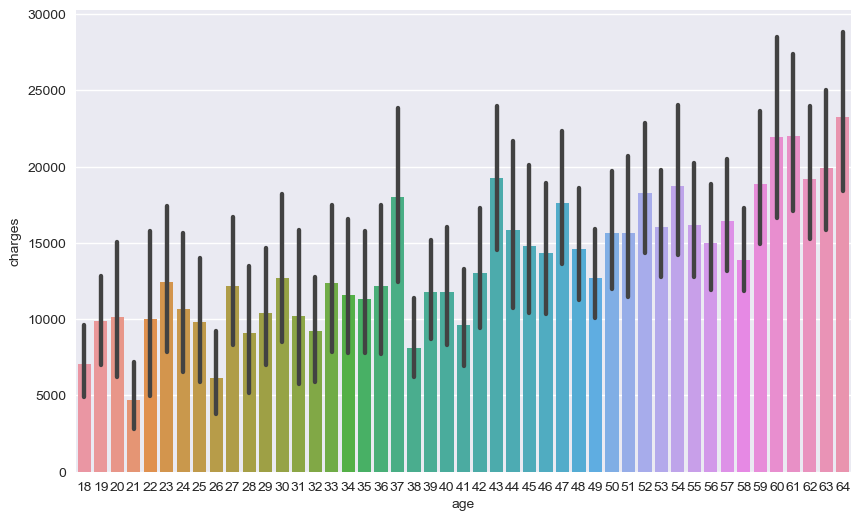

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="age" , y='charges' , data=df)
plt.show()

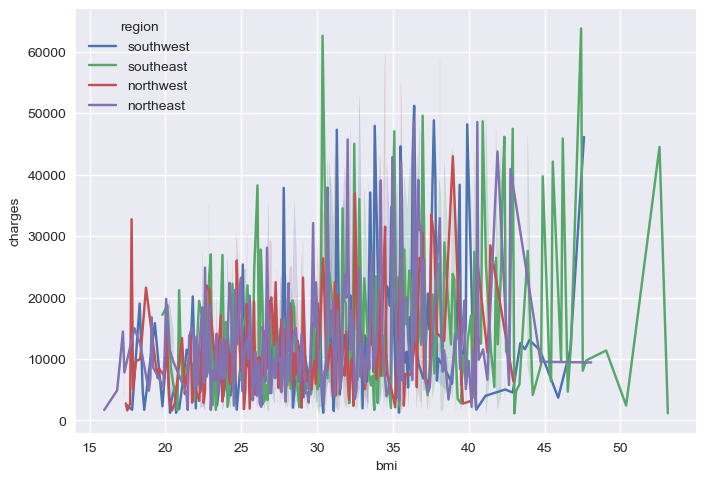

In [23]:
sns.lineplot(x='bmi' , y='charges' , data=df , hue='region')
plt.show()

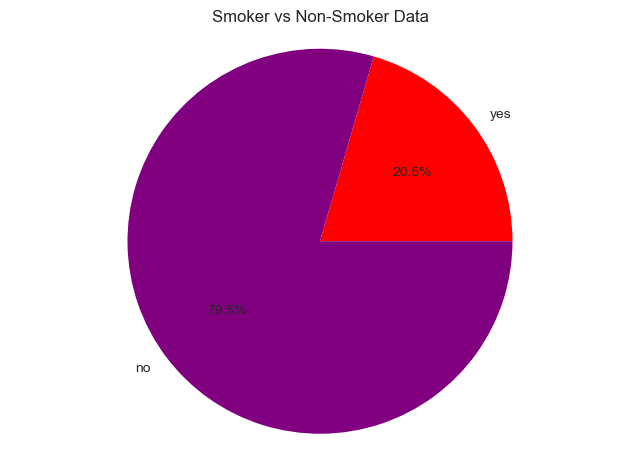

In [24]:
labels = list(df['smoker'].unique()) # Assigning Labels for the pie chart
values = [df['smoker'].tolist().count('yes') ,df['smoker'].tolist().count('no')] # Values of the Label
color = ['red' , 'purple'] # Assigning color to each part of the pie chart

plt.pie(values,labels=labels , colors=color ,autopct='%1.1f%%' ) # Code for creating pie chart
plt.axis('equal') 
plt.title("Smoker vs Non-Smoker Data") # Giving title to the chart
plt.show()

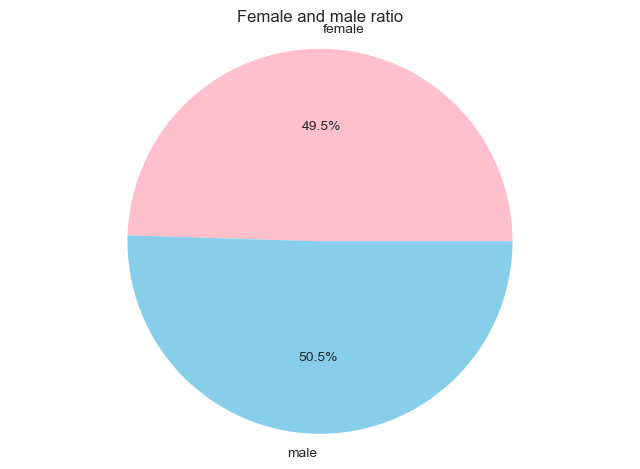

In [25]:
labels = list(df['sex'].unique()) # Assigning Labels for the pie chart
values = [df['sex'].tolist().count('female') , df['sex'].tolist().count('male')] # Values of the Label
colors = ['pink' , '#87CEEB'] # Assigning color to each part of the pie chart
plt.pie(values , labels = labels ,colors=colors , autopct = '%1.1f%%' )  # Code for creating pie chart
plt.axis('equal')
plt.title('Female and male ratio') # Giving title to the chart
plt.show()

In [26]:
numeric_data = df[['age' , 'bmi' , 'children' , 'charges']]

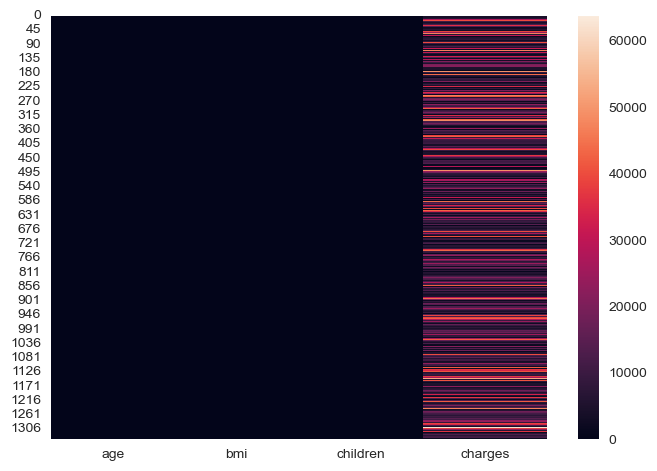

In [27]:
sns.heatmap(numeric_data) # plotting the heatmap to check correlaction between numeric data
plt.show()

In [28]:
from sklearn import preprocessing

In [29]:
# Converting Object dtypes to integers
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    
    df[col] = label_encoder.transform(df[col])

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


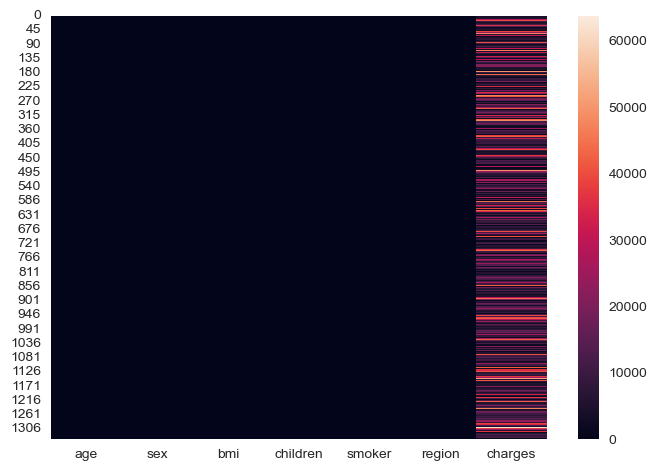

In [31]:
sns.heatmap(df)
plt.show()

In [32]:
X = df.drop('charges' , axis = 1) # Seperating Features from Dataset

In [33]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [34]:
y = df['charges'] # Seperating Labels from dataset

In [35]:
y = y/1000

In [36]:
y

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1337, dtype: float64

In [37]:
# Doing Featurescaling of X so that all the feature values came in a certain range
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X - Xmean)/Xstd

In [38]:
X = featurescaling(X)

In [39]:
X.mean(axis=0)

age        -5.314456e-17
sex        -6.377347e-17
bmi        -2.338361e-16
children    5.181594e-17
smoker      9.300298e-18
region      6.576639e-17
dtype: float64

In [40]:
X.std(axis=0)

age         1.0
sex         1.0
bmi         1.0
children    1.0
smoker      1.0
region      1.0
dtype: float64

# Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y , test_size=0.3,random_state=101) # Splitting data into test and train

In [43]:
model = LinearRegression()

In [44]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [45]:
y_predict = model.predict(Xtest)

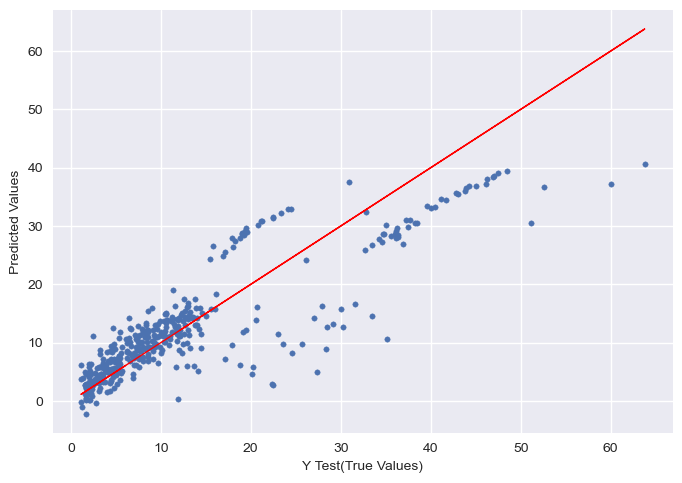

In [46]:
plt.scatter(ytest,y_predict,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(ytest, ytest, color='red', lw=1)

plt.show()

# Model Evaluation of Linear Regression Model

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
r2 = r2_score(ytest,y_predict)

In [49]:
r2

0.7494359237216639

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print('MSE:', metrics.mean_squared_error(ytest, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))

MAE: 3.9957580196092928
MSE: 35.11320112928976
RMSE: 5.925639301315071


In [51]:
print('Variance:', metrics.explained_variance_score(ytest, y_predict))

Variance: 0.7505591520509347


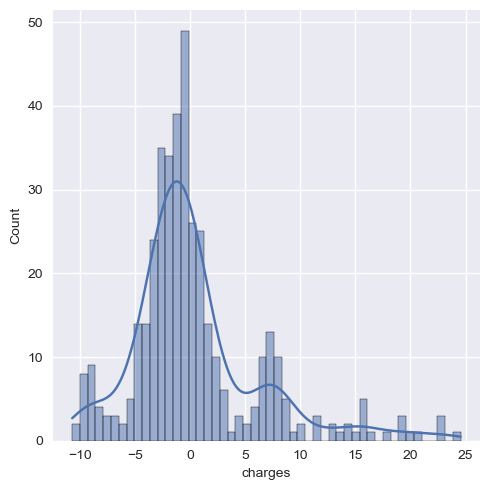

In [52]:
sns.displot((ytest-y_predict) , kde=True,bins=50)
plt.show()

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
decision_tree = DecisionTreeRegressor()

In [55]:
decision_tree.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [56]:
y_predict = decision_tree.predict(Xtest)

# Decision Tree Prediction Evaluation

In [57]:
decision_tree.score(Xtest,ytest)

0.7230184289371446

In [58]:
r2 = r2_score(ytest,y_predict)

In [59]:
r2

0.7230184289371446

In [60]:
print('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print('MSE:', metrics.mean_squared_error(ytest, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))

MAE: 2.9003469746716415
MSE: 38.81525938711589
RMSE: 6.230189354033783


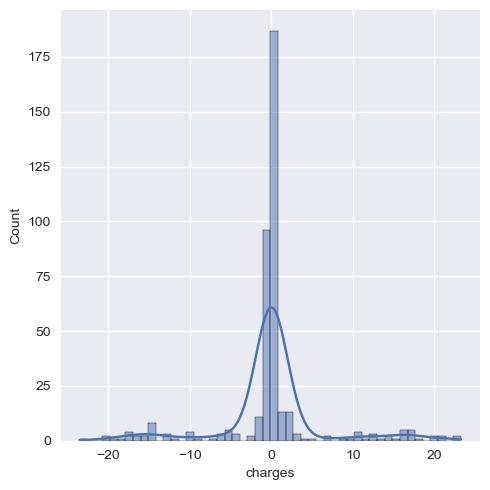

In [61]:
sns.displot((ytest-y_predict) , kde=True,bins=50)
plt.show()